In [1]:
import os
import clr
import sys
from System import Array
from time import sleep
import numpy as np
from matplotlib import pyplot as plt
# sys.path.append(os.getcwd())
%matplotlib inline

from qcodes.instrument_drivers.spincore import PulseBlasterESRPRO
PulseBlaster = PulseBlasterESRPRO.PulseBlaster('PulseBlaster')

from qcodes.instrument_drivers.lecroy import ArbStudio1104
dll_path = os.path.join(os.getcwd(),'lecroy_driver\\Library\\ArbStudioSDK.dll')
ArbStudio = ArbStudio1104.ArbStudio1104('ArbStudio', dll_path,
                                       server_name=None)

<IPython.core.display.Javascript object>

In [11]:
PulseBlaster.detect_boards()
PulseBlaster.select_board(0)
PulseBlaster.core_clock(500)
Narb = 10
Ndigitizer = 1000
Nlow = 1000000
PulseBlaster.start_programming()
start = PulseBlaster.send_instruction(3,'continue',0,Ndigitizer)
PulseBlaster.send_instruction(6,'continue',0,Narb)
PulseBlaster.send_instruction(0, 'continue', 0, Nlow)
PulseBlaster.send_instruction(6,'continue',0,Narb)
PulseBlaster.send_instruction(0, 'branch', start, Nlow)
PulseBlaster.stop_programming()


points = 20000
periods = 10
wave1 = 1.1*np.sin(2*np.pi*np.arange(points)/points*periods)

ArbStudio.ch1_trigger_mode('stepped')
ArbStudio.ch1_trigger_source('fp_trigger_in')

# Add waveforms
ArbStudio.ch1_clear_waveforms()
ArbStudio.ch1_add_waveform(wave1)
ArbStudio.ch1_add_waveform([0]*points)

#Add sequence
ArbStudio.ch1_sequence([(0,2),1])

#Load waveforms and sequence
waveforms = ArbStudio.load_waveforms()
sequences = ArbStudio.load_sequence()

In [12]:
ArbStudio.run([1])
PulseBlaster.start()

0

In [10]:
ArbStudio.stop()
PulseBlaster.stop()

0

In [16]:
from qcodes.instrument_drivers.AlazarTech import ATS_acquisition_controllers
from qcodes.instrument_drivers.AlazarTech import ATS9440

ATS_acquisition_controller = ATS_acquisition_controllers.Average_AcquisitionController()
ATS = ATS9440.ATS9440('ATS',server_name=None)
ATS.channel_range1._set(4)
ATS.channel_range2._set(4)

ATS.config(trigger_source1='EXTERNAL',
           trigger_level1=135,
           trigger_engine2='TRIG_ENGINE_K',
           channel_range=[2,2],
           sample_rate=10e6)

In [17]:
result = ATS.acquire(acquisition_controller=ATS_acquisition_controller,
                     buffer_timeout=1000,
                     samples_per_record=20000,
                     records_per_buffer=100,
                     buffers_per_acquisition=2)

bytes per sample 2
samples_per_record is 20000
bytes per record is 40000
samples_per_buffer is 2000000
bytes_per_buffer  is 8000000
records_per_buffer is 100
buffers cleared
made buffer list length 2
completed AlazarPostAsyncBuffer
Capturing 2 buffers.
buffers cleared


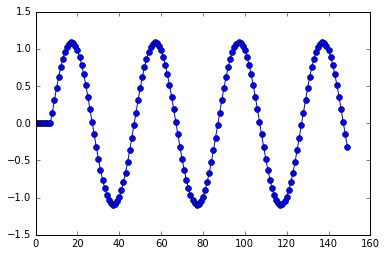

In [18]:
plt.plot(result[0][5000:5150], 'o-')
# plt.plot(result[1])

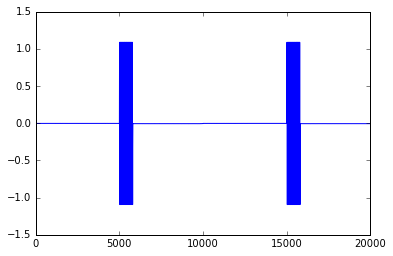

In [19]:
plt.plot(result[0])